<a href="https://www.kaggle.com/code/dikshaaswal/music-and-mental-health-analysis?scriptVersionId=167903088" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
/
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv


In [2]:
data = pd.read_csv("/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv")

In [3]:
data.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
data.shape

(736, 33)

In [5]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [6]:
data['Frequency [Country]'].unique()

array(['Never', 'Sometimes', 'Very frequently', 'Rarely'], dtype=object)

In [7]:
data['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [8]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [9]:
#very few columns values are null, lets check them one by one

In [10]:
data[data.Age.isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
12,8/27/2022 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.


In [11]:
data.Age.unique()

array([18., 63., 61., 21., 19., nan, 17., 16., 15., 14., 20., 26., 23.,
       37., 36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43.,
       28., 34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56.,
       59., 10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55.,
       48., 71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [12]:
data.Age.min()

10.0

In [13]:
data.Age.max()

89.0

In [14]:
data.Age = data.Age.fillna(-1.0)

In [15]:
data.Age.unique()

array([18., 63., 61., 21., 19., -1., 17., 16., 15., 14., 20., 26., 23.,
       37., 36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43.,
       28., 34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56.,
       59., 10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55.,
       48., 71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [16]:
bins = [10, 20, 30, 40, 50, 60,  70, 80, 90]
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
data['Age_group'] = pd.cut(data.Age, bins, labels=labels)

In [17]:
data['Age_group'].unique()

['10-19', '60-69', '20-29', NaN, '30-39', '40-49', '50-59', '70-79', '80-89']
Categories (8, object): ['10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79' < '80-89']

/tmp/ipykernel_18/990335600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_ = data.groupby(['Age_group']).size()


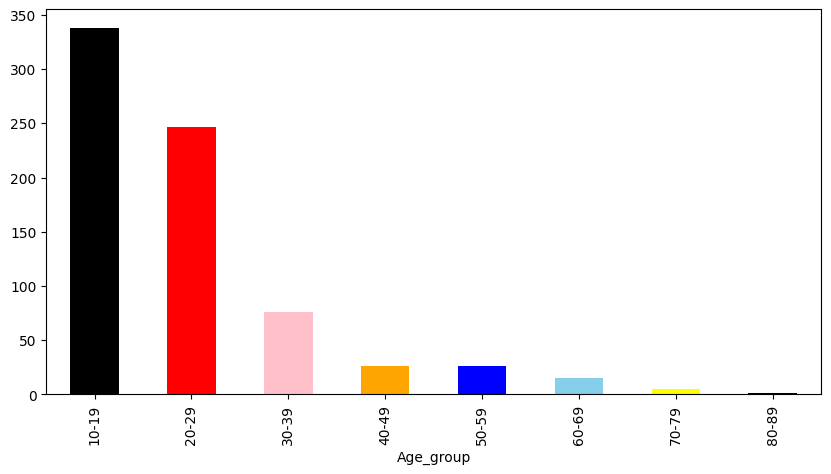

In [18]:
age_counts_ = data.groupby(['Age_group']).size()
color = ['black', 'red', 'pink', 'orange', 'blue', 'skyblue','yellow']
ax = age_counts_.plot(kind='bar',  color = color, stacked=False)
# Add labels over each bar
# ax.set_xticklabels(age_counts['Fav genre'].unique())
fig = plt.gcf()
fig.set_size_inches(10,5)

In [19]:
age_counts = data.groupby(['Age_group'])
age_genre_counts = age_counts['Fav genre'].value_counts()

/tmp/ipykernel_18/3443885041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = data.groupby(['Age_group'])


In [20]:
age_genre_counts = age_genre_counts.unstack()

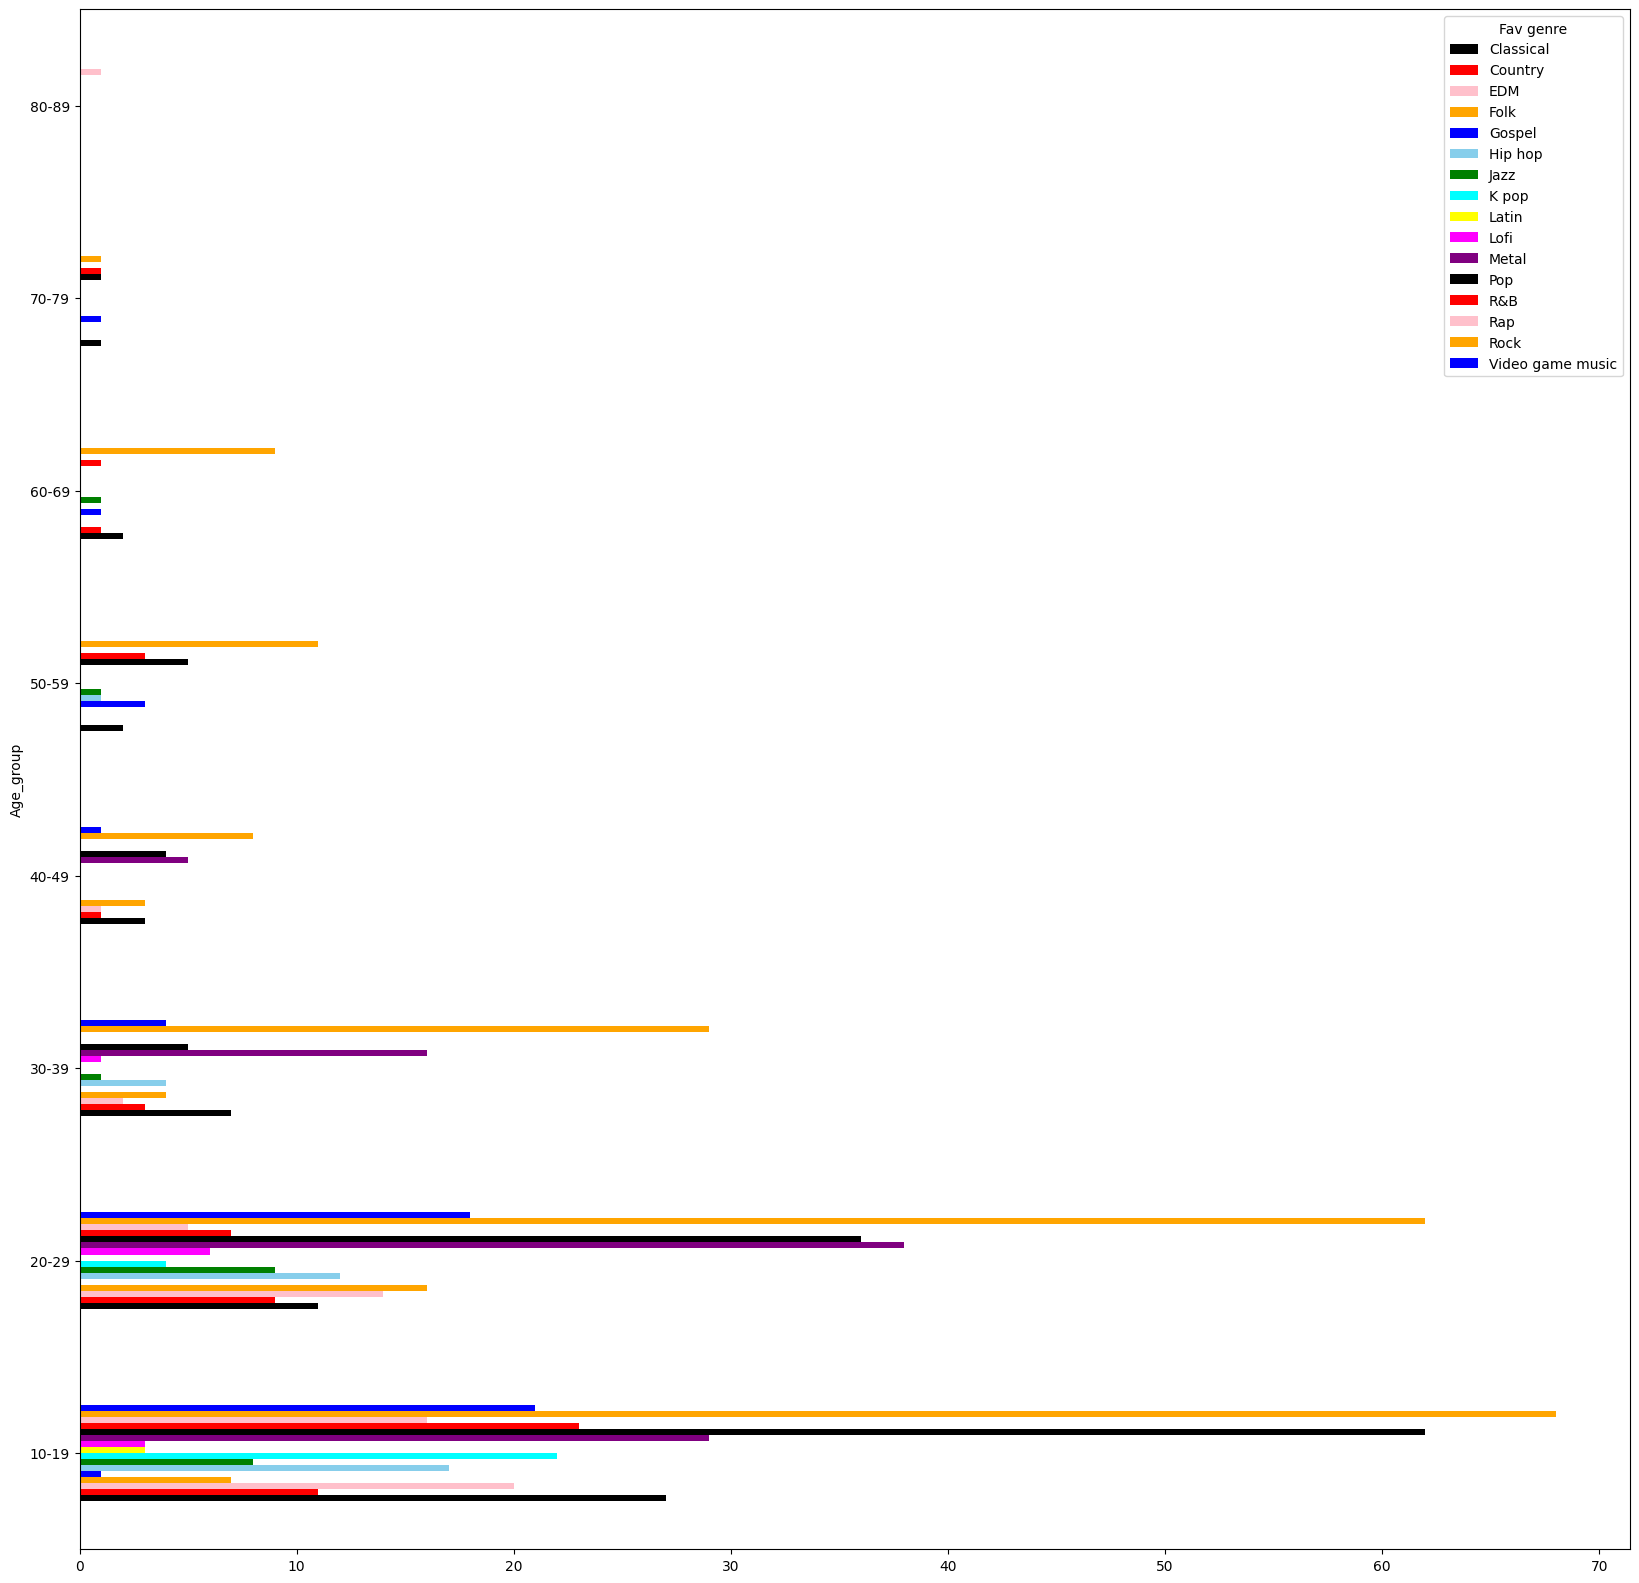

In [21]:
color = ['black', 'red', 'pink', 'orange', 'blue', 'skyblue', 'green', 'cyan', 'yellow','magenta','purple']
ax = age_genre_counts.plot(kind='barh',  color = color, stacked=False)
# Add labels over each bar
# ax.set_xticklabels(age_counts['Fav genre'].unique())

fig = plt.gcf()
fig.set_size_inches(20,20)

In [22]:
data[data['Age'] == -1]['Fav genre']

12    Hip hop
Name: Fav genre, dtype: object

In [23]:
age_genre_counts

Fav genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
Age_group,,,,,,,,,,,,,,,,
10-19,27,11,20,7,1,17,8,22,3,3,29,62,23,16,68,21
20-29,11,9,14,16,0,12,9,4,0,6,38,36,7,5,62,18
30-39,7,3,2,4,0,4,1,0,0,1,16,5,0,0,29,4
40-49,3,1,1,3,0,0,0,0,0,0,5,4,0,0,8,1
50-59,2,0,0,0,3,1,1,0,0,0,0,5,3,0,11,0
60-69,2,1,0,0,1,0,1,0,0,0,0,0,1,0,9,0
70-79,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
80-89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
data[data['Age'] == -1][['Frequency [Classical]','Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]','Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]','Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]','Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]','Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']]

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
12,Rarely,Never,Rarely,Never,Never,Very frequently,Never,Sometimes,Never,Very frequently,Never,Sometimes,Sometimes,Rarely,Rarely,Never


In [25]:
row_index = data[data['Age'] == -1].index
row_index

Index([12], dtype='int64')

In [26]:
data.at[12, 'Age'] = 25

In [27]:
data[data['Primary streaming service'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age_group
197,8/28/2022 20:50:37,21.0,NaN,5.0,Yes,No,No,Country,Yes,No,...,Rarely,Very frequently,Never,9.0,8.0,9.0,7.0,Improve,I understand.,20-29


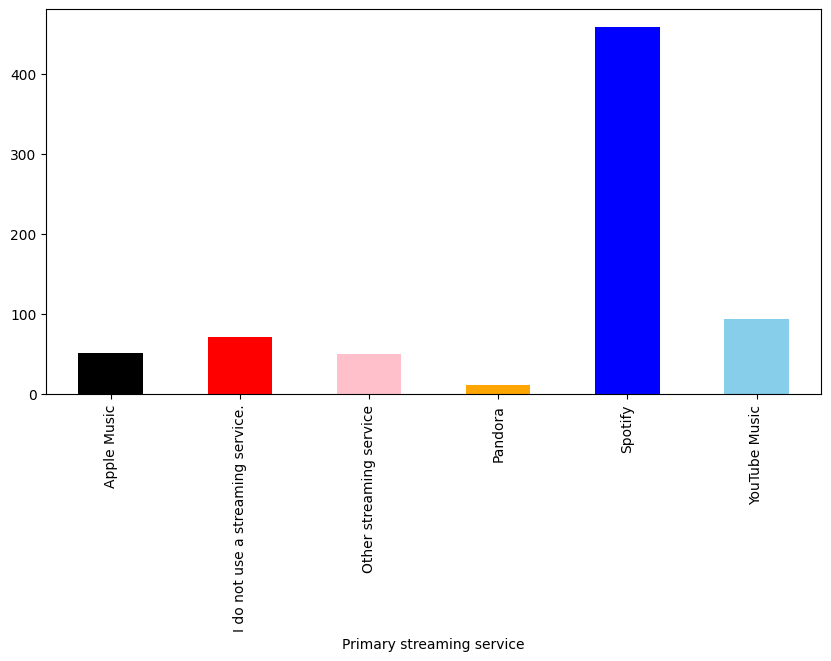

In [28]:
primary_streaming_counts = data.groupby(['Primary streaming service']).size()
color = ['black', 'red', 'pink', 'orange', 'blue', 'skyblue','yellow']
ax = primary_streaming_counts.plot(kind='bar',  color = color, stacked=False)
# Add labels over each bar
# ax.set_xticklabels(age_counts['Fav genre'].unique())
fig = plt.gcf()
fig.set_size_inches(10,5)

In [29]:
data['Primary streaming service'] = data['Primary streaming service'].fillna('Spotify',)

In [30]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Age_group'],
      dtype='object')

In [31]:
pd.crosstab(data['Hours per day'], data['Music effects'])

Music effects,Improve,No effect,Worsen
Hours per day,,,
0.00,2,3,1
0.10,0,1,0
0.25,2,1,0
0.50,14,5,1
0.70,1,0,0
1.00,79,32,4
1.50,10,4,1
2.00,126,41,4
2.50,6,0,0


In [32]:
data[data['Instrumentalist'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age_group
223,8/28/2022 22:06:46,18.0,YouTube Music,12.0,Yes,NaN,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,3.0,7.0,5.0,2.0,Improve,I understand.,10-19
408,8/29/2022 23:36:14,13.0,YouTube Music,3.0,Yes,NaN,Yes,Classical,No,No,...,Never,Never,Never,8.0,7.0,9.0,2.0,Improve,I understand.,10-19
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.,20-29
572,9/4/2022 21:29:06,18.0,Spotify,3.0,Yes,NaN,No,Video game music,Yes,Yes,...,Never,Never,Very frequently,7.0,0.0,3.0,1.0,No effect,I understand.,10-19


In [33]:
data['Instrumentalist'].unique()

array(['Yes', 'No', nan], dtype=object)

In [34]:
data['Instrumentalist'] = data['Instrumentalist'].fillna(data['Composer'])

In [35]:
data[data['Instrumentalist'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age_group
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.,20-29


In [36]:
pd.crosstab(data['Instrumentalist'], data['Music effects'])

Music effects,Improve,No effect,Worsen
Instrumentalist,,,
No,353,129,13
Yes,189,40,4


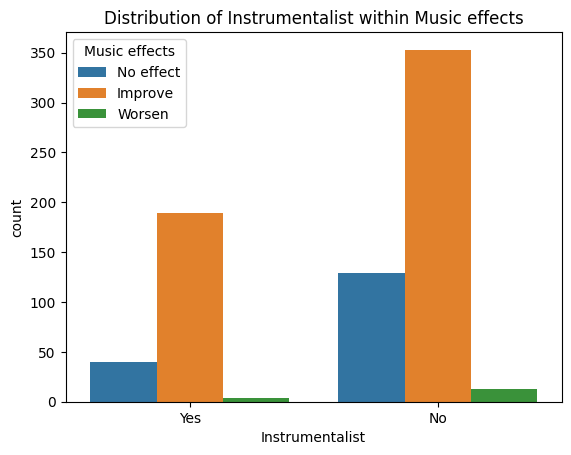

In [37]:
sns.countplot(data=data, x='Instrumentalist', hue='Music effects')
plt.title('Distribution of Instrumentalist within Music effects')
plt.show()

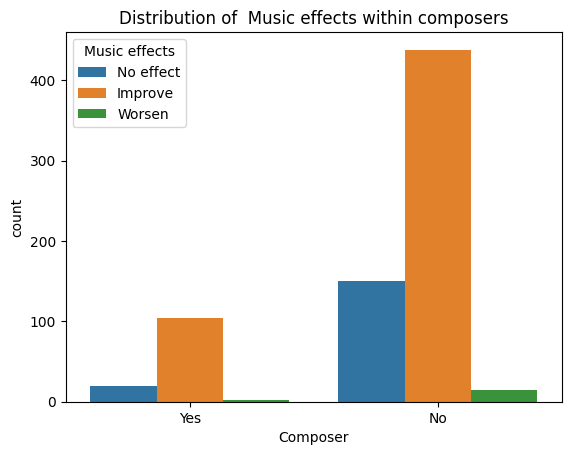

In [38]:
sns.countplot(data=data, x='Composer', hue='Music effects')
plt.title('Distribution of  Music effects within composers')
plt.show()

In [39]:
#No relation between composer and music effect

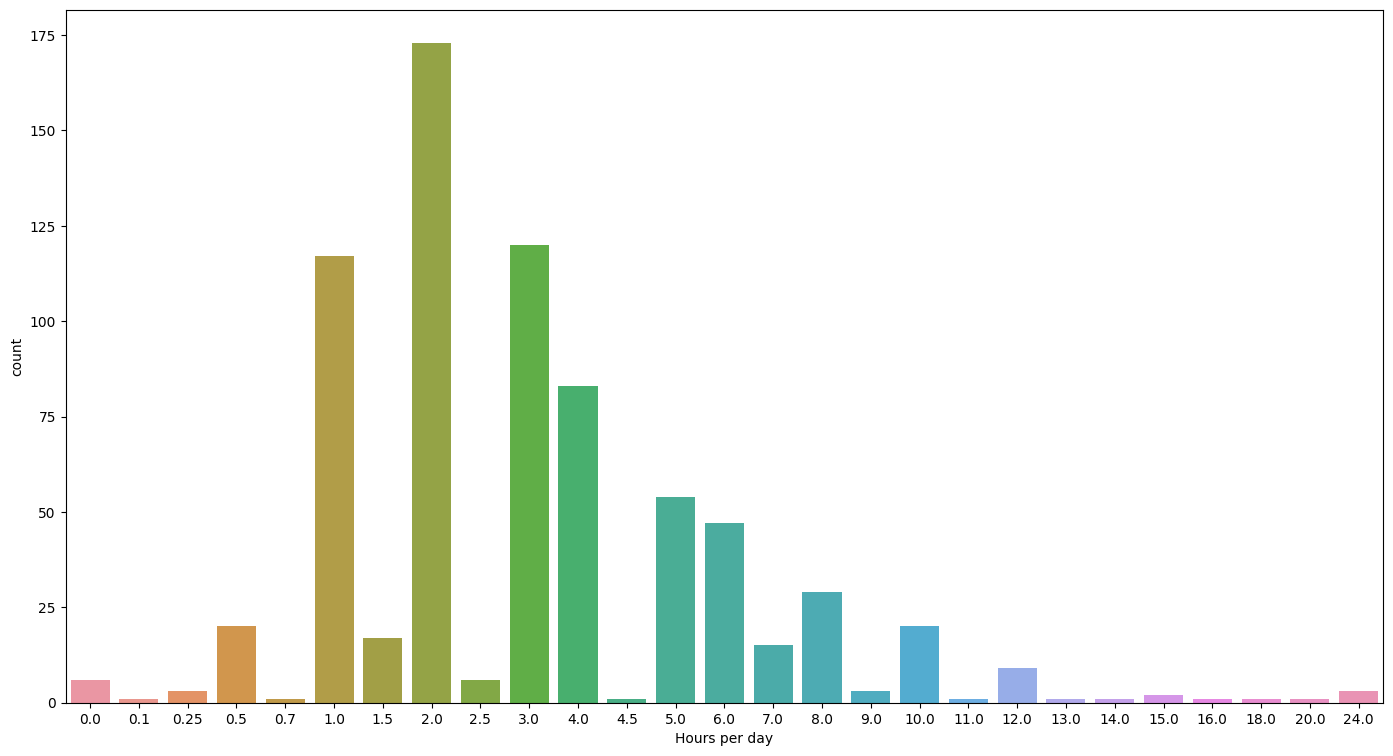

In [40]:
plt.figure(figsize=(17,9))
sns.countplot(data=data, x='Hours per day')
plt.show()

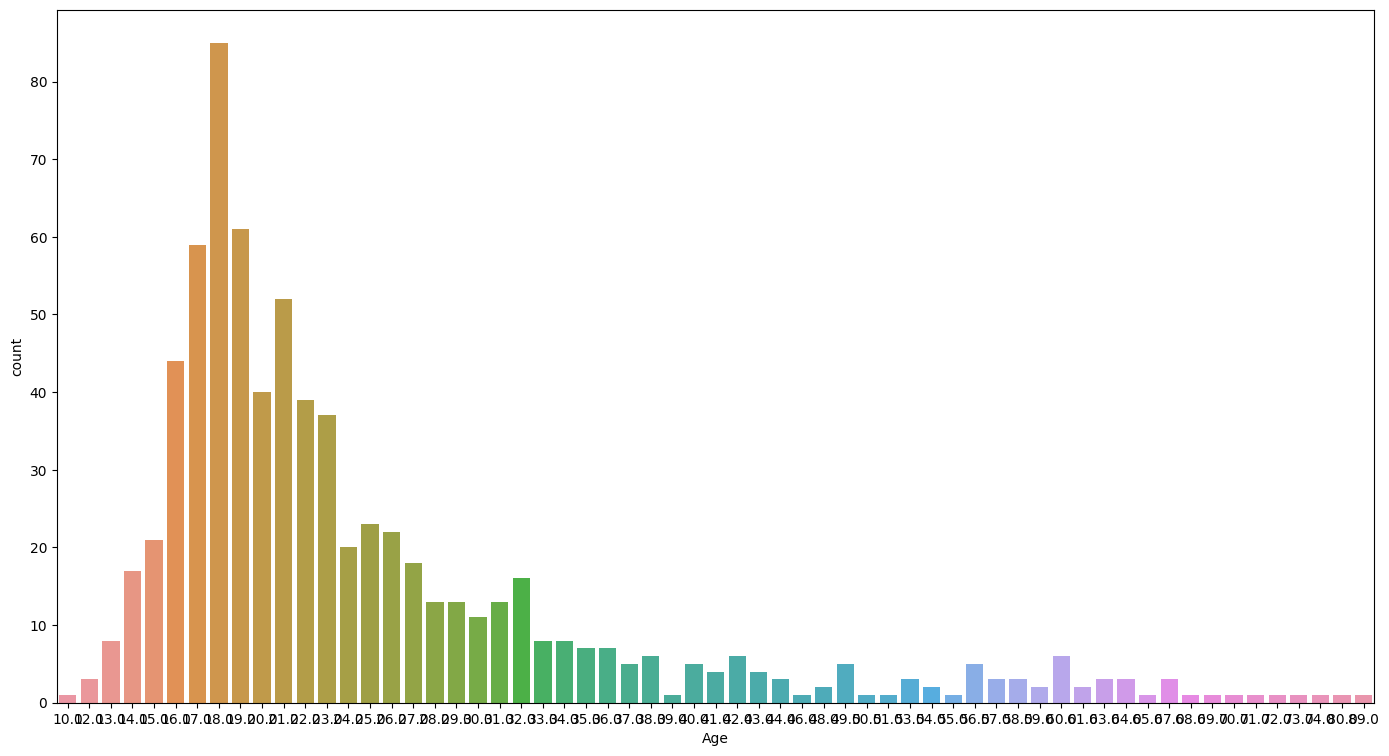

In [41]:
plt.figure(figsize=(17,9))
sns.countplot(data=data, x='Age')
plt.show()

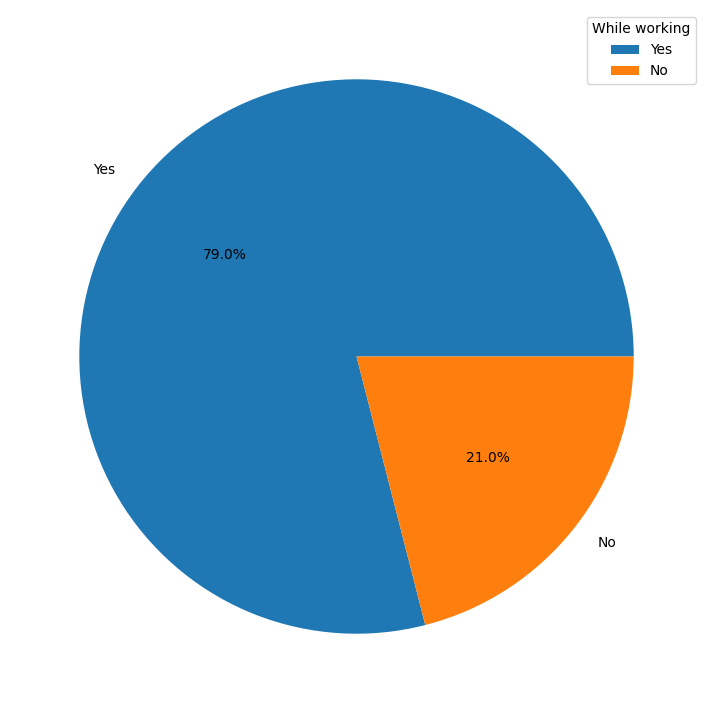

In [42]:
plt.figure(figsize=(17,9))
plt.pie(data['While working'].value_counts(), labels = data['While working'].value_counts().index, autopct = '%.001f%%')
plt.legend(title = "While working", bbox_to_anchor = (1,1))
plt.show()

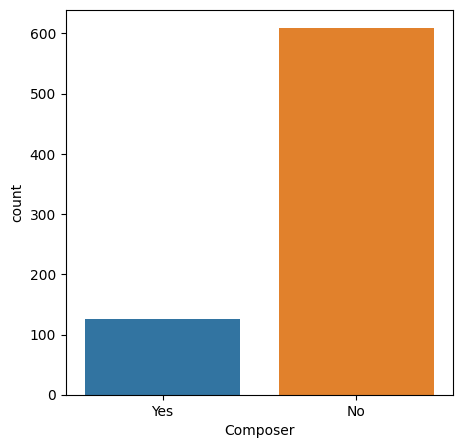

In [43]:
# data['Composer']

plt.figure(figsize=(5,5))
sns.countplot(data=data, x='Composer')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

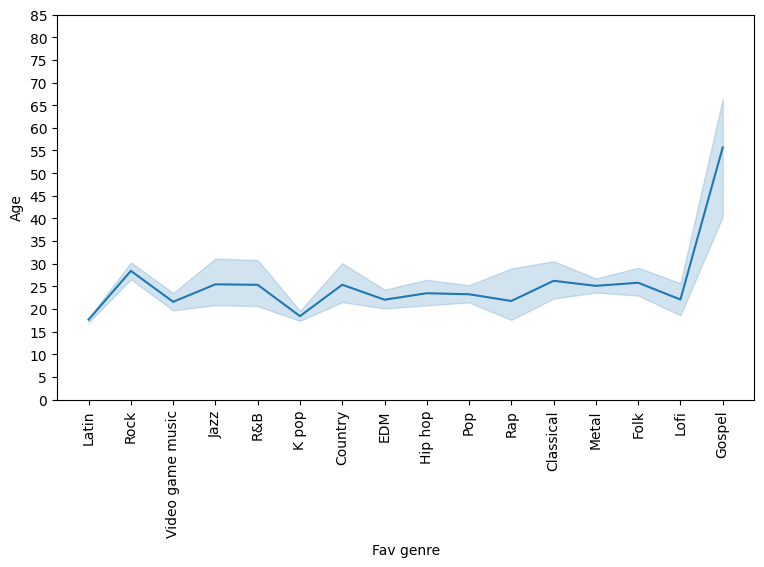

In [44]:
plt.figure(figsize = (9,5))
sns.lineplot(data = data, x = 'Fav genre', y = 'Age')
plt.yticks(np.arange(0,90,5))
plt.xticks(rotation =90)

In [45]:
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age_group
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.,10-19
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.,60-69
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,10-19
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,60-69
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.,10-19
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.,10-19
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.,10-19
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.,10-19


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

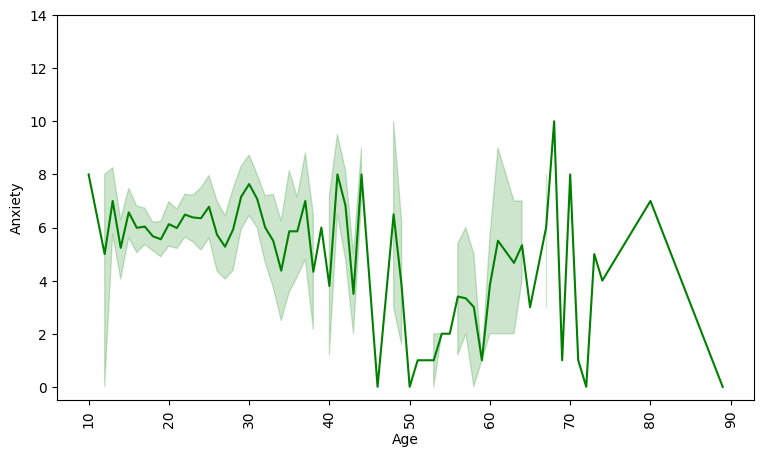

In [46]:
plt.figure(figsize = (9,5))
sns.lineplot(data = data, x = 'Age', y = 'Anxiety', color = 'green')
plt.yticks(np.arange(0,15,2))
plt.xticks(rotation =90)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

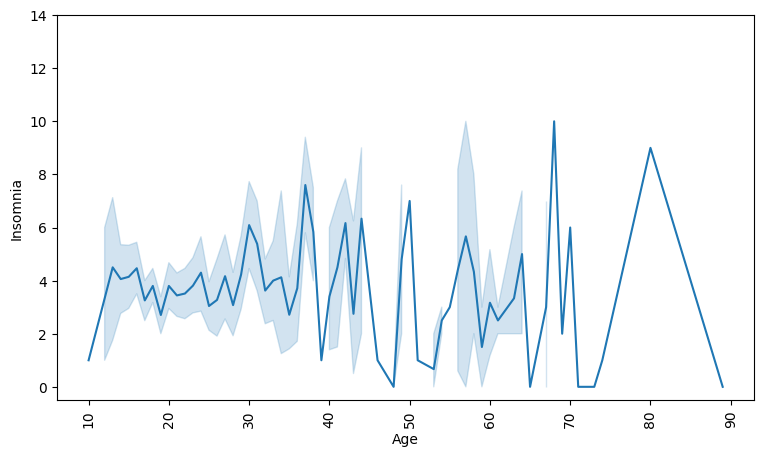

In [47]:
plt.figure(figsize = (9,5))
sns.lineplot(data = data, x = 'Age', y = 'Insomnia')
plt.yticks(np.arange(0,15,2))
plt.xticks(rotation =90)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

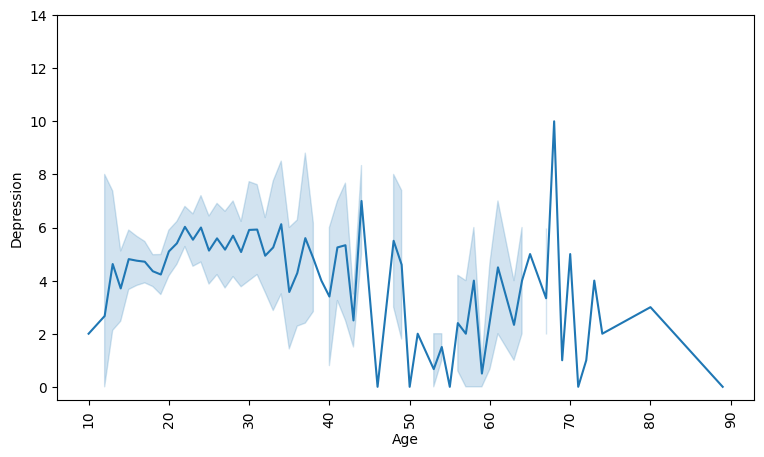

In [48]:
plt.figure(figsize = (9,5))
sns.lineplot(data = data, x = 'Age', y = 'Depression')
plt.yticks(np.arange(0,15,2))
plt.xticks(rotation =90)

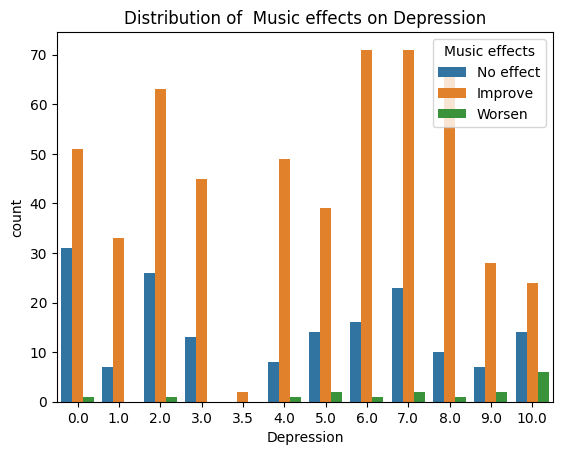

In [49]:
sns.countplot(data=data, x='Depression', hue='Music effects')
plt.title('Distribution of  Music effects on Depression')
plt.show()

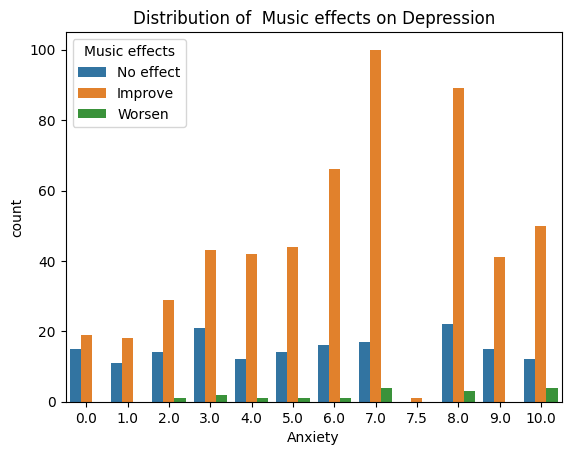

In [50]:
sns.countplot(data=data, x='Anxiety', hue='Music effects')
plt.title('Distribution of  Music effects on Depression')
plt.show()

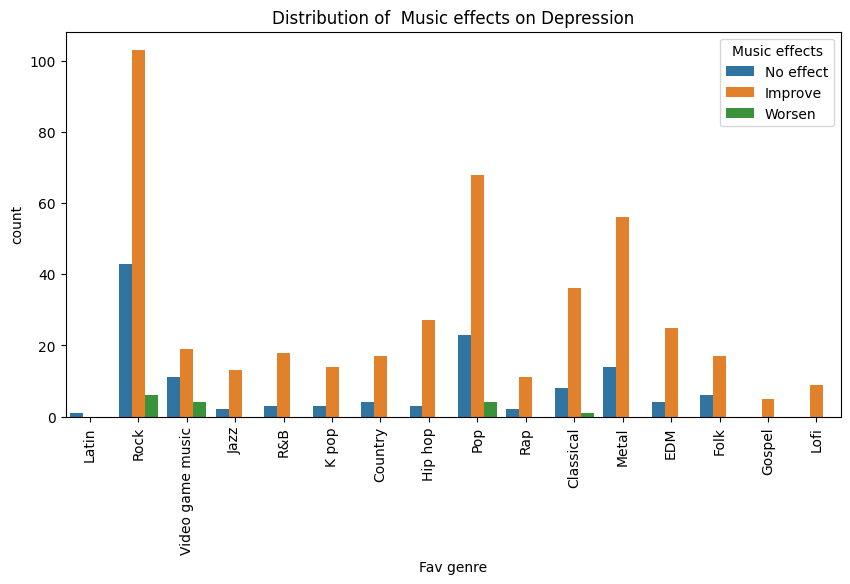

In [51]:
data1 = data[data['Insomnia']>0]
plt.figure(figsize = (10,5))
sns.countplot(data=data1, x='Fav genre', hue='Music effects')
plt.title('Distribution of  Music effects on Depression')
plt.xticks(rotation = 90)
plt.show()

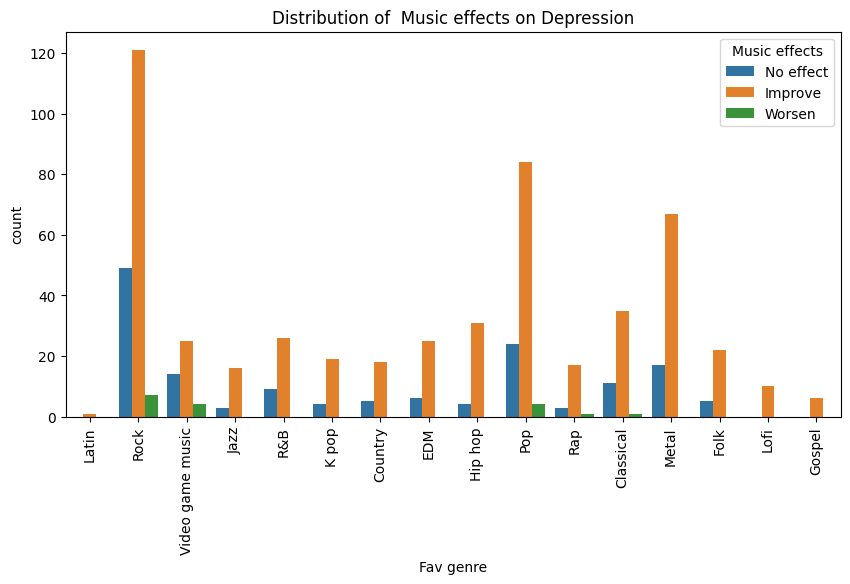

In [52]:
data1 = data[data['Anxiety']>0]
plt.figure(figsize = (10,5))
sns.countplot(data=data1, x='Fav genre', hue='Music effects')
plt.title('Distribution of  Music effects on Depression')
plt.xticks(rotation = 90)
plt.show()